In [3]:
# データ取得
# df_n225 = pdr.DataReader('NIKKEI225', 'fred')  # fredの場合

# yahooの場合
start = '2019-1-1'
end = datetime.date.today()  #  現在の日付
df_n225 = pdr.DataReader('^N225', 'yahoo', start, end)

In [4]:
# float64になっている事の確認、float64になっていない場合、statsmodelsのArimaモデル等でエラーになる
df_n225.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [5]:
df_n225.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-04,19692.580078,19241.369141,19655.130859,19561.960938,91600000,19561.960938
2019-01-07,20266.220703,19920.800781,19944.609375,20038.970703,81500000,20038.970703
2019-01-08,20347.919922,20106.359375,20224.669922,20204.039062,86400000,20204.039062
2019-01-09,20494.349609,20331.199219,20366.300781,20427.060547,72800000,20427.060547
2019-01-10,20345.919922,20101.929688,20270.880859,20163.800781,73700000,20163.800781


In [6]:
# 終値の移動平均(5日)を取得して、カラムに追加
# 移動最大値・移動最小値の場合は、rolling関数の結果をmeanからmax若しくはminに変更
df_n225['SMA5'] = df_n225['Close'].rolling(window=5).mean()

In [7]:
# 移動平均(25日)も追加
df_n225['SMA25'] = df_n225['Close'].rolling(window=25).mean()

In [8]:
# 移動平均(75日)も追加
df_n225['SMA75'] = df_n225['Close'].rolling(window=75).mean()

In [9]:
df_n225.head()

,High,Low,Open,Close,Volume,Adj Close,SMA5,SMA25,SMA75
Date,,,,,,,,,
2019-01-04,19692.580078,19241.369141,19655.130859,19561.960938,91600000,19561.960938,NaN,NaN,NaN
2019-01-07,20266.220703,19920.800781,19944.609375,20038.970703,81500000,20038.970703,NaN,NaN,NaN
2019-01-08,20347.919922,20106.359375,20224.669922,20204.039062,86400000,20204.039062,NaN,NaN,NaN
2019-01-09,20494.349609,20331.199219,20366.300781,20427.060547,72800000,20427.060547,NaN,NaN,NaN
2019-01-10,20345.919922,20101.929688,20270.880859,20163.800781,73700000,20163.800781,20079.166406,NaN,NaN


In [11]:
df_n225.head()

,High,Low,Open,Close,Volume,Adj Close,SMA5,SMA25,SMA75,SMMAX5
Date,,,,,,,,,,
2019-01-04,19692.580078,19241.369141,19655.130859,19561.960938,91600000,19561.960938,NaN,NaN,NaN,NaN
2019-01-07,20266.220703,19920.800781,19944.609375,20038.970703,81500000,20038.970703,NaN,NaN,NaN,NaN
2019-01-08,20347.919922,20106.359375,20224.669922,20204.039062,86400000,20204.039062,NaN,NaN,NaN,NaN
2019-01-09,20494.349609,20331.199219,20366.300781,20427.060547,72800000,20427.060547,NaN,NaN,NaN,NaN
2019-01-10,20345.919922,20101.929688,20270.880859,20163.800781,73700000,20163.800781,20079.166406,NaN,NaN,20427.060547


In [44]:
# mplfinance用にデータ削減
df_n225_mpf= df_n225.tail(90)

In [54]:
# csv出力
# df_n225.to_csv('./data/nikkei225.csv')

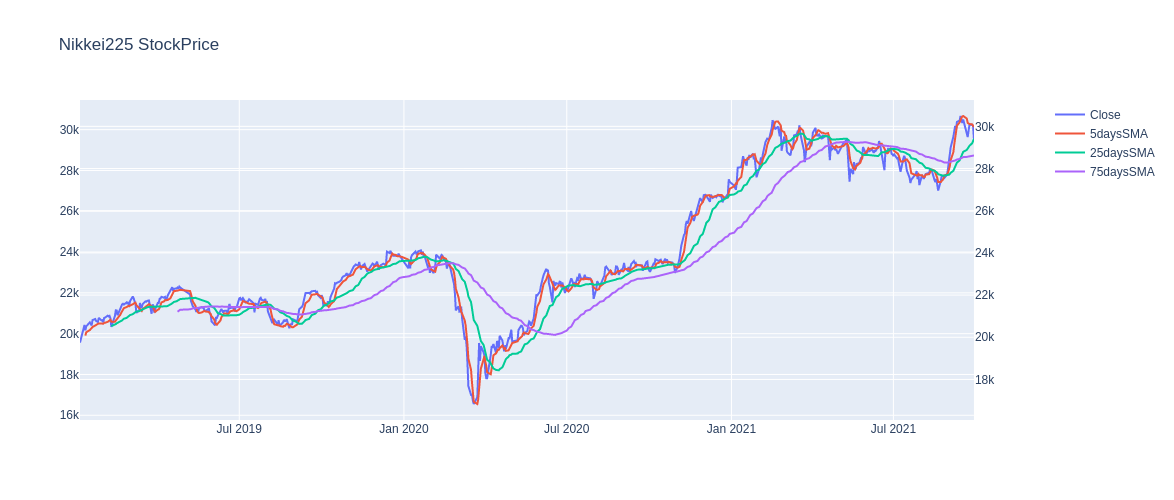

In [61]:
# plot
fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_n225.index, y=df_n225['Close'], name="Close"),  # Close
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=df_n225.index, y=df_n225['SMA5'], name="5daysSMA"),  # 5days SMA
    row=1, col=1, secondary_y=True)
    # 5days moving average
    
fig.add_trace(
    go.Scatter(x=df_n225.index, y=df_n225['SMA25'], name="25daysSMA"),  # 25days SMA
    row=1, col=1, secondary_y=True)

fig.add_trace(
    go.Scatter(x=df_n225.index, y=df_n225['SMA75'], name="75daysSMA"),  # 75days SMA
    row=1, col=1, secondary_y=True)

fig.update_layout(height=500, title="Nikkei225 StockPrice")

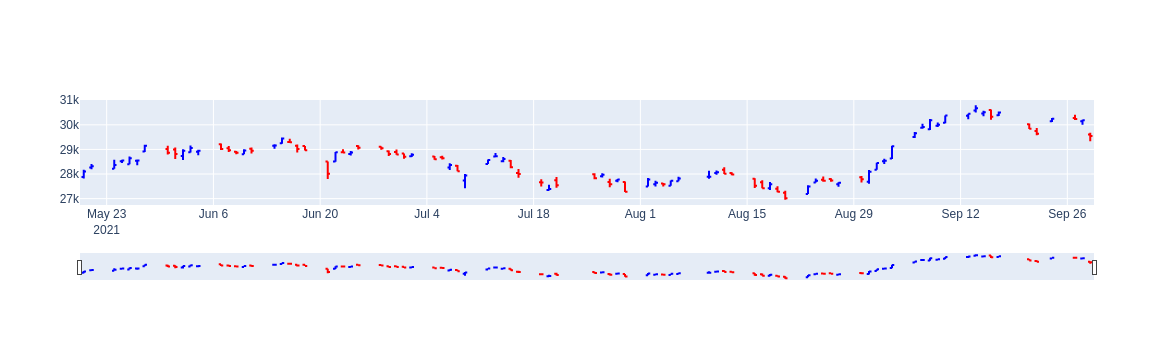

In [62]:
# plot
# figを定義
# fig, ax = plt.subplots(figsize=(20, 10))
# OHLCチャートをplot
#
fig_02 = go.Figure(data=[go.Ohlc(
    # x=df_n225['Date'],
    x=df_n225_mpf.index,
    open=df_n225_mpf['Open'], high=df_n225_mpf['High'],
    low=df_n225_mpf['Low'], close=df_n225_mpf['Close'],
    increasing_line_color= 'blue', decreasing_line_color= 'red'
)])
# fig.update(height=500, title="Nikkei225 StockPrice OHLC Chart")
fig_02.show()

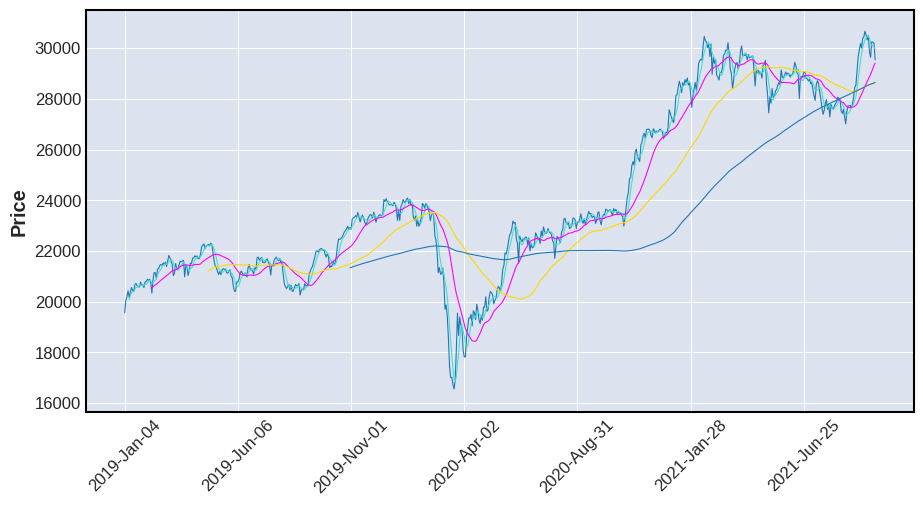

In [50]:
# plot
mpf.plot(df_n225, type="line", mav=(5, 25, 75, 200) ,figratio=(10, 5))  # データが長期間の場合は、lineチャート

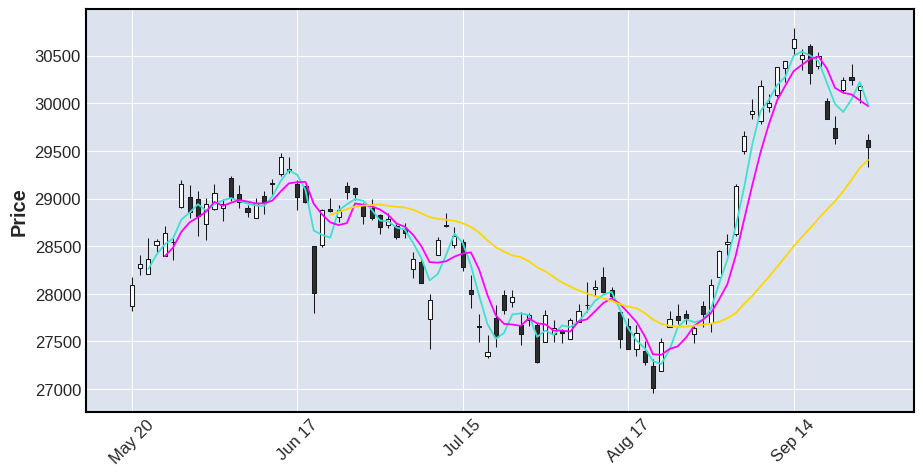

In [46]:
mpf.plot(df_n225_mpf, type="candle", mav=(3, 5, 25), figratio=(10, 5))

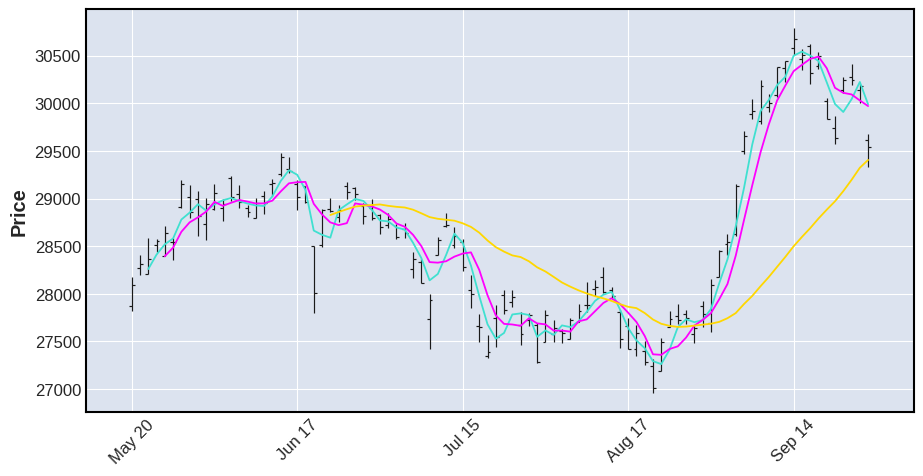

In [47]:
mpf.plot(df_n225_mpf, type="ohlc", mav=(3, 5, 25), figratio=(10, 5))

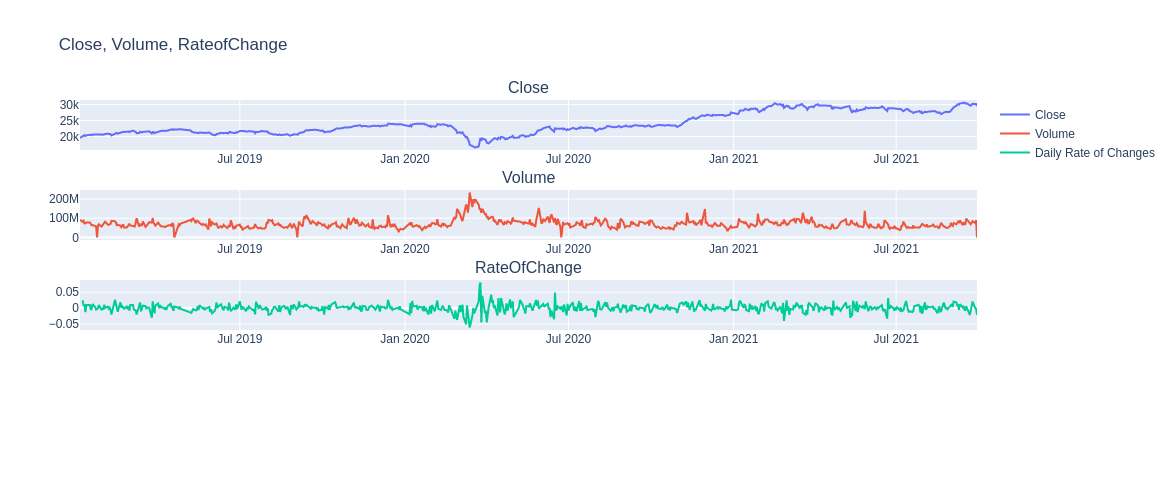

In [83]:
# STL decomposition
fig_03 = make_subplots(rows=4, cols=1, subplot_titles=["Close", "Volume", "RateOfChange"])

fig_03 = fig_03.add_scatter(x=df_n225.index, y=df_n225['Close'],
        name="Close", row=1, col=1)  # Close

fig_03 = fig_03.add_scatter(x=df_n225.index, y=df_n225['Volume'],
        name="Volume", row=2, col=1)  # Volume

fig_03 = fig_03.add_scatter(x=df_n225.index, y=df_n225['Close'].pct_change(),
        name="Daily Rate of Changes", row=3, col=1)  # Volume
fig_03.update_layout(height=500, width=700, title_text="Close, Volume, RateofChange")

In [66]:
res_stl7 = sm.tsa.STL(df_n225['Close'], period=7).fit()  # 季節成分に分解

In [67]:
res_stl30 = sm.tsa.STL(df_n225['Close'], period=30).fit()  # 季節成分に分解

In [68]:
res_stl90 = sm.tsa.STL(df_n225['Close'], period=90).fit()  # 季節成分に分解

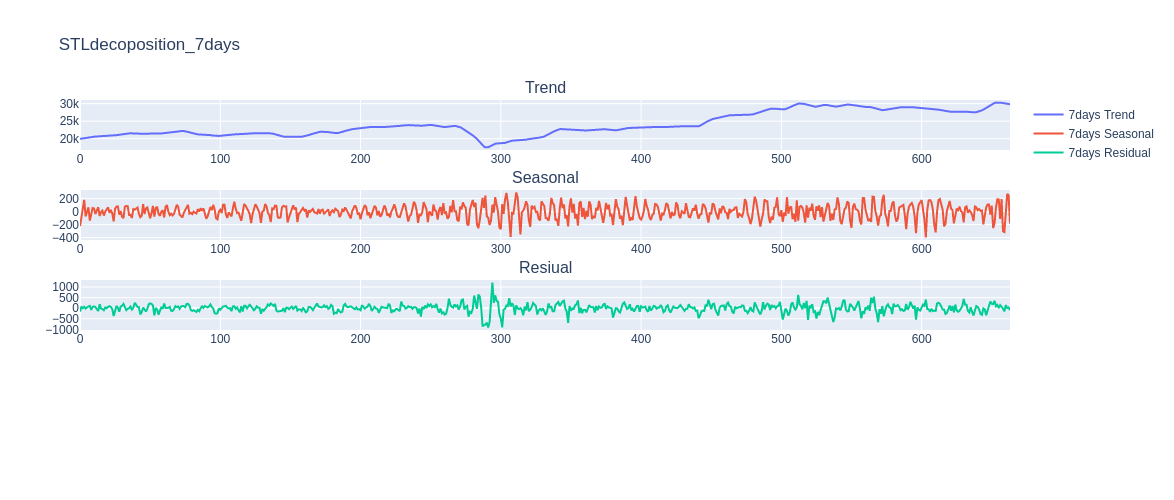

In [79]:
# STL分解の結果(7日)
fig_04 = make_subplots(rows=4, cols=1, subplot_titles= ["Trend", "Seasonal", "Resiual"])  # タイトルの設定

fig_04 = fig_04.add_scatter(y=res_stl7.trend,
        name="7days Trend", row=1, col=1)  # Trend

fig_04 = fig_04.add_scatter(y=res_stl7.seasonal,
        name="7days Seasonal", row=2, col=1)  # Seasonal

fig_04 = fig_04.add_scatter(y=res_stl7.resid,
        name="7days Residual", row=3, col=1)  # Residual
fig_04.update_layout(height=500, width=700, title_text="STLdecoposition_7days")

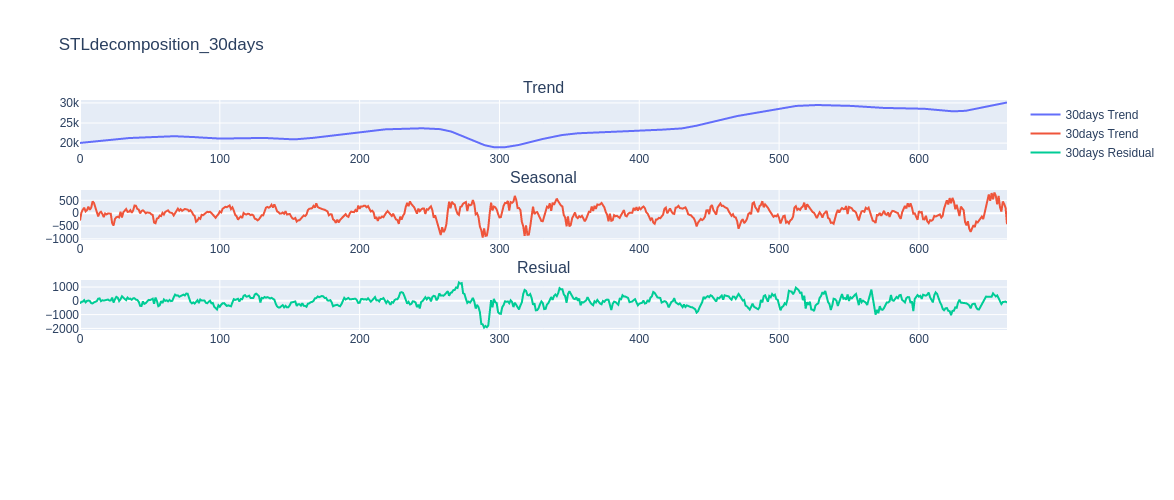

In [80]:
# STL分解の結果(30日)
fig_05 = make_subplots(rows=4, cols=1, subplot_titles= ["Trend", "Seasonal", "Resiual"])

fig_05 = fig_05.add_scatter(y=res_stl30.trend,
        name="30days Trend", row=1, col=1)  # Trend

fig_05 = fig_05.add_scatter(y=res_stl30.seasonal,
        name="30days Trend", row=2, col=1)  # Seasonal

fig_05 = fig_05.add_scatter(y=res_stl30.resid,
        name="30days Residual", row=3, col=1)  # Residual
fig_05.update_layout(height=500, width=700, title_text="STLdecomposition_30days")

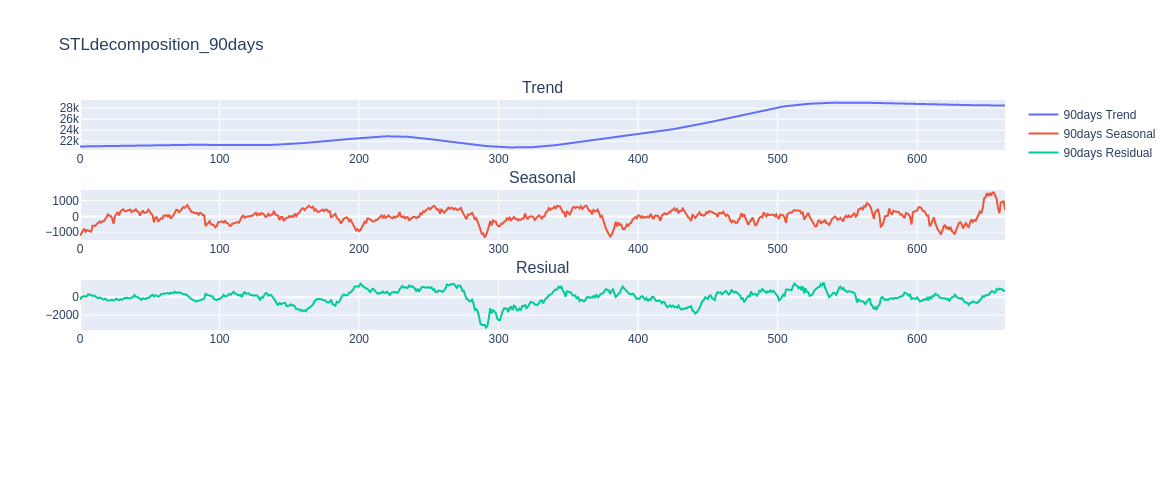

In [81]:
# STL分解の結果(90日)
fig_06 = make_subplots(rows=4, cols=1, subplot_titles= ["Trend", "Seasonal", "Resiual"])

fig_06 = fig_06.add_scatter(y=res_stl90.trend,
        name="90days Trend", row=1, col=1)  # Trend

fig_06 = fig_06.add_scatter(y=res_stl90.seasonal,
        name="90days Seasonal", row=2, col=1)  # Seasonal

fig_06 = fig_06.add_scatter(y=res_stl90.resid,
        name="90days Residual", row=3, col=1)  # Residual
fig_06.update_layout(height=500, width=700, title_text="STLdecomposition_90days")